# Classify Iris Plants into three species - KNN from Scratch

###### Importing libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###### Reading the input csv file and displaying first 10 data points

In [29]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_df = pd.read_csv(url, names=col_names)
iris_df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


###### Data set description

In [30]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


###### Checking for null values

In [31]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

###### Converting Object type column of Species into int type (Label Encoding)

In [32]:
new_species = []
for i in range(len(iris_df)):
    if (iris_df['species'][i] == 'Iris-setosa'):
        new_species.append(0)
    elif (iris_df['species'][i] == 'Iris-versicolor'):
        new_species.append(1)
    elif (iris_df['species'][i] == 'Iris-virginica'):
        new_species.append(2)
iris_df['species_n'] = new_species
iris_df.drop(['species'], axis = 1, inplace = True)
iris_df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species_n
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


### Train Test Split

###### Randomly selecting 80% of the dataset to give train set

In [33]:
train_set = iris_df.sample(frac = 0.8)
train_set

,sepal_length,sepal_width,petal_length,petal_width,species_n
110,6.5,3.2,5.1,2.0,2
93,5.0,2.3,3.3,1.0,1
107,7.3,2.9,6.3,1.8,2
5,5.4,3.9,1.7,0.4,0
23,5.1,3.3,1.7,0.5,0
...,...,...,...,...,...
64,5.6,2.9,3.6,1.3,1
121,5.6,2.8,4.9,2.0,2
119,6.0,2.2,5.0,1.5,2
120,6.9,3.2,5.7,2.3,2


###### Creating the test set out of the remaining 20% of the dataset

In [34]:
test_set = iris_df.copy()
delete = train_set.index.tolist()
test_set.drop(delete, inplace = True)
test_set

,sepal_length,sepal_width,petal_length,petal_width,species_n
3,4.6,3.1,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
21,5.1,3.7,1.5,0.4,0
22,4.6,3.6,1.0,0.2,0
24,4.8,3.4,1.9,0.2,0
25,5.0,3.0,1.6,0.2,0
30,4.8,3.1,1.6,0.2,0
34,4.9,3.1,1.5,0.1,0
36,5.5,3.5,1.3,0.2,0
38,4.4,3.0,1.3,0.2,0


###### Separating features and labels of the train set in x_train and y_train

In [35]:
x_train = train_set.iloc[:,:-1].values
y_train = train_set.iloc[:,-1].values

###### Printing the features of train set

In [36]:
print(x_train)

[[6.5 3.2 5.1 2. ]
 [5.  2.3 3.3 1. ]
 [7.3 2.9 6.3 1.8]
 [5.4 3.9 1.7 0.4]
 [5.1 3.3 1.7 0.5]
 [6.2 3.4 5.4 2.3]
 [5.5 2.4 3.7 1. ]
 [4.8 3.  1.4 0.1]
 [7.9 3.8 6.4 2. ]
 [5.7 2.6 3.5 1. ]
 [5.4 3.4 1.7 0.2]
 [5.  3.2 1.2 0.2]
 [6.  3.4 4.5 1.6]
 [7.7 3.  6.1 2.3]
 [5.  3.5 1.3 0.3]
 [6.1 3.  4.6 1.4]
 [5.1 3.4 1.5 0.2]
 [5.1 3.5 1.4 0.3]
 [5.8 2.7 5.1 1.9]
 [6.8 2.8 4.8 1.4]
 [5.6 3.  4.5 1.5]
 [6.  2.7 5.1 1.6]
 [6.9 3.1 4.9 1.5]
 [5.7 3.  4.2 1.2]
 [5.8 2.7 4.1 1. ]
 [6.  2.9 4.5 1.5]
 [7.7 2.6 6.9 2.3]
 [5.1 3.8 1.9 0.4]
 [6.1 2.6 5.6 1.4]
 [7.4 2.8 6.1 1.9]
 [5.8 2.8 5.1 2.4]
 [5.4 3.4 1.5 0.4]
 [5.1 3.5 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [6.6 2.9 4.6 1.3]
 [5.2 3.5 1.5 0.2]
 [5.3 3.7 1.5 0.2]
 [6.4 3.1 5.5 1.8]
 [5.6 2.7 4.2 1.3]
 [6.3 3.3 4.7 1.6]
 [5.5 2.4 3.8 1.1]
 [6.3 2.3 4.4 1.3]
 [6.9 3.1 5.4 2.1]
 [6.4 2.7 5.3 1.9]
 [6.4 2.9 4.3 1.3]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [6.7 3.1 4.7 1.5]
 [4.8 3.  1.4 0.3]
 [6.9 3.1 5.1 2.3]
 [4.9 3.1 1.5 0.1]
 [4.7 3.2 1.6 0.2]
 [5.7 3.8 1.

###### Printing the labels of train set

In [37]:
print(y_train)

[2 1 2 0 0 2 1 0 2 1 0 0 1 2 0 1 0 0 2 1 1 1 1 1 1 1 2 0 2 2 2 0 0 0 1 0 0
 2 1 1 1 1 2 2 1 0 0 1 0 2 0 0 0 1 0 2 2 0 2 1 1 1 2 2 1 0 2 2 2 0 2 0 0 2
 2 0 0 0 1 0 0 1 1 1 1 2 2 2 2 2 1 1 2 2 0 1 0 2 1 2 1 1 2 0 0 1 1 1 2 0 1
 2 2 0 2 1 2 2 2 0]


###### Separating features and labels of the test set in x_test and y_test

In [38]:
x_test = test_set.iloc[:,:-1].values
y_test = test_set.iloc[:,-1].values

###### Printing the features of test set

In [39]:
print(x_test)

[[4.6 3.1 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [4.9 3.1 1.5 0.1]
 [5.5 3.5 1.3 0.2]
 [4.4 3.  1.3 0.2]
 [4.5 2.3 1.3 0.3]
 [5.1 3.8 1.6 0.2]
 [5.5 2.3 4.  1.3]
 [5.2 2.7 3.9 1.4]
 [5.6 2.5 3.9 1.1]
 [5.9 3.2 4.8 1.8]
 [6.1 2.8 4.  1.3]
 [6.7 3.  5.  1.7]
 [5.8 2.7 3.9 1.2]
 [5.8 2.6 4.  1.2]
 [5.7 2.9 4.2 1.3]
 [6.2 2.9 4.3 1.3]
 [6.3 2.9 5.6 1.8]
 [4.9 2.5 4.5 1.7]
 [6.8 3.  5.5 2.1]
 [6.5 3.  5.5 1.8]
 [6.7 3.3 5.7 2.1]
 [7.2 3.2 6.  1.8]
 [6.4 2.8 5.6 2.1]
 [6.7 3.1 5.6 2.4]]


###### Printing the labels of test set

In [40]:
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2]


## K Neighbors Classification

### K Neighbors Classification - 3 Neighbors

###### Defining function to calculate Euclidean distance between 2 data points

In [41]:
def calc_distance(train_row, test_row):
    r1 = np.array(train_row)
    r2 = np.array(test_row)
    dist = 0
    for i in range(len(train_row)):
        if i < len(test_row):
            dist += (train_row[i] - test_row[i]) ** 2
    return np.sqrt(dist)

###### Defining function to predict the plant species class given the distances to all other data points

In [42]:
def predict(neighbors, k):
    neighbors.sort(key = lambda x: x[1])
    count = [0]*3
    for i in range(k):
        nb = int(np.array(neighbors[i][0])[4])
        count[nb] += 1
    max_ind = 0
    for i in range(len(count)):
        if (count[i] > count[max_ind]):
            max_ind = i
    return max_ind

###### Defining function to classify the plant species for a given data point

In [43]:
def knn_classifier(k, train_set, test_row):
    neighbors = []
    dist = 0.0
    for i in range(len(train_set)):
        dist = calc_distance(train_set.iloc[i][:-1], test_row)
        neighbors.append((train_set.iloc[i], dist))
    return predict(neighbors, k)

###### Defining function to calculate the accuracy of the model given the actual values and predicted values of the label

In [44]:
def calc_accuracy(y_test, y_pred):
    correct = 0
    for i in range(len(y_test)):
        if y_test[i] == y_pred[i]:
            correct += 1
    return ((correct / len(y_test)) * 100)

###### Predicting the label for 3 neighbors and finding the accuracy

In [45]:
k = 3
y_pred = []
test_set
for i in range(len(test_set)):
    test_row = test_set.iloc[i].values
    prediction = knn_classifier(k, train_set, test_row)
    y_pred.append(prediction)
accuracy = calc_accuracy(y_test, y_pred)
print('Accuracy of the model when k = 3: ',"{:.2f}".format(accuracy),'%')

Accuracy of the model when k = 3:  93.33 %


###### True Values vs. Prediction

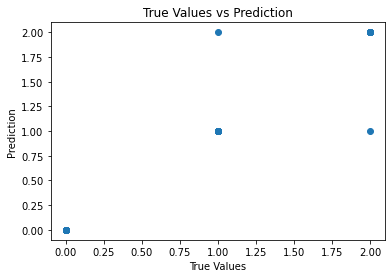

In [46]:
plt.scatter(y_test, y_pred)
plt.title("True Values vs Prediction")
plt.xlabel("True Values")
plt.ylabel("Prediction")
plt.show()

###### Printing the confusion matrix

In [47]:
cm = []
a,b,c,d,e,f,x,y,z = 0,0,0,0,0,0,0,0,0
for i in range(len(y_test)):
    if y_test[i] == 0:
        if y_pred[i] == 0:
            a += 1
        elif y_pred[i] == 1:
            b += 1
        elif y_pred[i] == 2:
            c += 1
    elif y_test[i] == 1:
        if y_pred[i] == 0:
            d += 1
        elif y_pred[i] == 1:
            e += 1
        elif y_pred[i] == 2:
            f += 1
    elif y_test[i] == 2:
        if y_pred[i] == 0:
            x += 1
        elif y_pred[i] == 1:
            y += 1
        elif y_pred[i] == 2:
            z += 1
cm.append([a,b,c])
cm.append([d,e,f])
cm.append([x,y,z])
print(cm)

[[12, 0, 0], [0, 9, 1], [0, 1, 7]]


###### Printing the Precision and Recall values

In [48]:
cr = []
for i in range(3):
    p = cm[i][i] / (cm[0][i]+cm[1][i]+cm[2][i])
    r = cm[i][i] / (cm[i][0]+cm[i][1]+cm[i][2])
    cr.append(["{:.2f}".format(p),"{:.2f}".format(r)])
print("precision\trecall")
for i in range(3):
    print(" ",cr[i][0],"\t\t",cr[i][1])

precision	recall
  1.00 		 1.00
  0.90 		 0.90
  0.88 		 0.88


### K Neighbors Classification - 1 to 40 Neighbors

###### Defining function to predict the labels of the test set

In [49]:
def knn_for_k(k, train_set, test_set):
    y_pred = []
    for i in range(len(test_set)):
        test_row = test_set.iloc[i].values
        prediction = knn_classifier(k, train_set, test_row)
        y_pred.append(prediction)
    return y_pred

###### Predicting the labels for 1 to 40 neighbors and printing the accuracies

In [50]:
accuracy_k = []
for k in range(1,41):
    y_pred = knn_for_k(k, train_set, test_set)
    accuracy = calc_accuracy(y_test, y_pred)
    accuracy_k.append("{:.2f}".format(accuracy))
print(accuracy_k)

['93.33', '93.33', '93.33', '93.33', '93.33', '93.33', '90.00', '96.67', '93.33', '96.67', '93.33', '96.67', '93.33', '96.67', '90.00', '93.33', '93.33', '93.33', '93.33', '93.33', '93.33', '93.33', '93.33', '93.33', '90.00', '93.33', '90.00', '93.33', '90.00', '90.00', '90.00', '93.33', '93.33', '93.33', '90.00', '96.67', '93.33', '93.33', '93.33', '93.33']


###### K Values vs. Accuracies

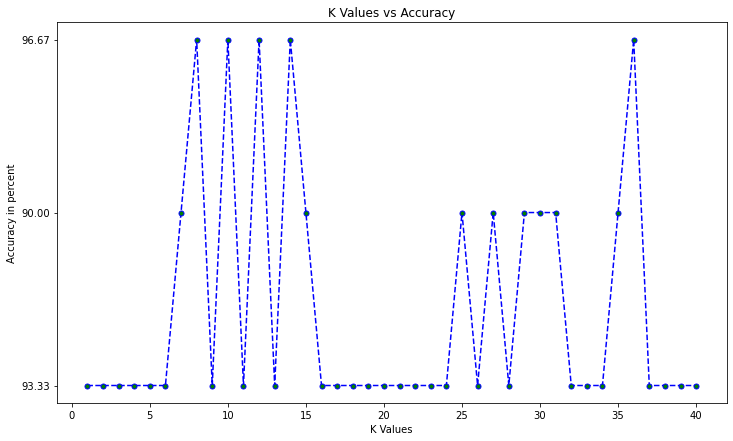

In [51]:
plt.figure(figsize=(12, 7))
plt.plot(range(1, 41), accuracy_k, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=5)
plt.title("K Values vs Accuracy")
plt.xlabel("K Values")
plt.ylabel("Accuracy in percent")
plt.show()